In [1]:
from driver import driver

In [2]:
driver.get("https://www.google.es")

In [1]:
from competitor import Competitor

from db import conn

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
driver.find_element_by_class_name("gLFyf.gsfi").click().send_keys("trump")

AttributeError: 'NoneType' object has no attribute 'send_keys'

In [ ]:
import os

In [ ]:
sns.set(font_scale=1.3)

## Load competitor

In [2]:
comps = conn.as_pandas('select * from competitors where category="women_52"', parse_dates=['last_extraction'])
comps.head()

,name,country,profile_id,category,last_extraction
0,BUCHARD Amandine,FRA,7539,women_52,2021-04-16
1,ABE Uta,JPN,35696,women_52,2021-05-05
2,SHISHIME Ai,JPN,10017,women_52,2021-01-11
3,GIUFFRIDA Odette,ITA,3469,women_52,2021-04-16
4,KELMENDI Majlinda,KOS,11273,women_52,2021-02-18


In [5]:
c = Competitor("3469")

In [6]:
b = c.get_battles()
a = c.get_actions()

In [7]:
assert b.shape[0] > 0
assert a.shape[0] > 0

In [204]:
num_combates_approx = a.url_youtube.nunique()

In [182]:
path_informe = f"./informes/{c.name}/"

In [183]:
try:
    os.makedirs(path_informe)
except:
    print("ERROR: ya existe el dir")

ERROR: ya existe el dir


## Time and golden score

In [101]:
def get_seconds(time_str):
    m, s = time_str.split(":")
    
    m, s = int(m), int(s)
    
    return m * 60 + s

In [102]:
b["seconds"] = b.duration.apply(get_seconds)
# no queremos combates de 0 seconds
b = b[b.seconds != 0]

In [103]:
mean_time = b.seconds.mean().round().astype(int)

In [104]:
n_gs = (b.seconds > 240).sum()

In [105]:
perc_golden_score = int(n_gs / b.shape[0] * 100)

In [106]:
gs_win = b[b.seconds > 240].wins.sum()
gs_lose = n_gs - gs_win

In [107]:
b.shape

(101, 14)

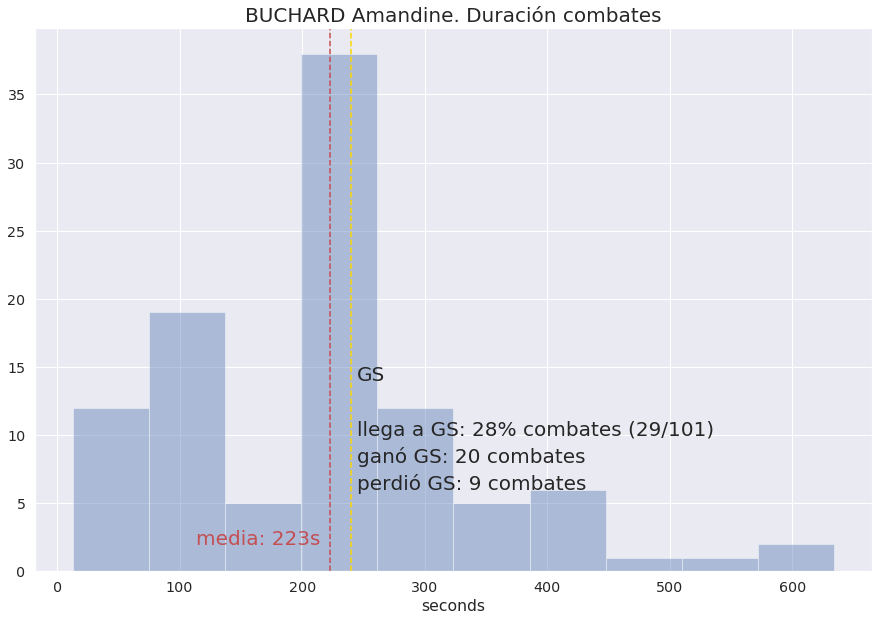

In [170]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.distplot(b.seconds, kde=False, 
             #binwidth=10
            )
g.set_title(f"{c.name}. Duración combates", fontsize=20)
# media
ax.axvline(mean_time, linestyle="--", color="r")
ax.annotate(f"media: {mean_time}s", (mean_time - 110, 2), c="r", fontsize=20)

# gs
ax.axvline(240, linestyle="--", color="#FFD700")
ax.annotate(f"GS", (240 + 5, 14), fontsize=20)
ax.annotate(f"llega a GS: {perc_golden_score}% combates ({n_gs}/{b.shape[0]})", (240 + 5, 10), fontsize=20)

ax.annotate(f"ganó GS: {gs_win} combates", (240 + 5, 8), fontsize=20)
ax.annotate(f"perdió GS: {gs_lose} combates", (240 + 5, 6), fontsize=20)

fig.set_title = "a"

In [186]:
fig.savefig(f"./{path_informe}{c.name} time battles.png")

## Shidos

### Detail

In [188]:
order_shidos = [
    'Shido / Non-Combativity',
    'Shido / False-Attack',
    'Shido / Avoid-Grip',
    'Shido / Outside-Contest-Area',
    'Shido / Defensive-Posture',
    'Shido / Fingers-In-Sleeve',
    'Shido / Hold-Sleeve-Ends',
    'Shido / Hold-Same-Side',
    'Shido / Push-Out',
    'Shido / Pistol-Grip',
    'Shido / Hold-Trouser-Leg',
    'Shido / Escape-With-Head'
]

In [189]:
shidos = a[a.action_detail.str.contains("Shido")]
shidos_favor = shidos.groupby(['you', 'action_detail']).size().loc[0].reindex(order_shidos)
shidos_contra = shidos.groupby(['you', 'action_detail']).size().loc[1].reindex(order_shidos)
max_shidos = max(shidos_contra.max(), shidos_favor.max())

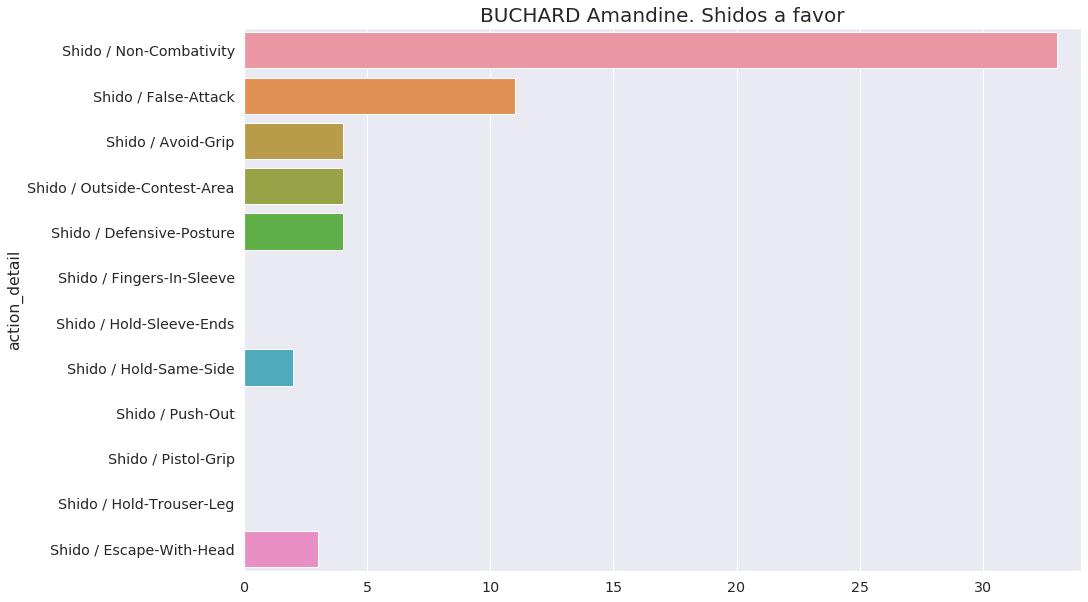

In [194]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.barplot(x=shidos_favor.values, y=shidos_favor.index)
g.set(xlim=(0, max_shidos + 1));
g.set_title(f"{c.name}. Shidos a favor", fontsize=20);

In [195]:
fig.savefig(f"./{path_informe}{c.name} shidos favor.png")

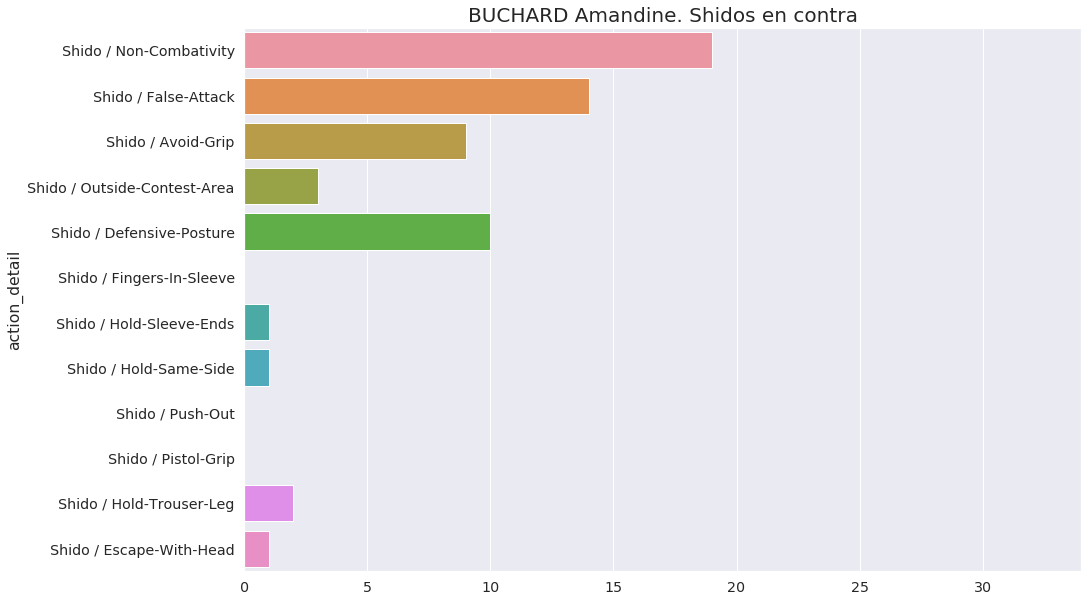

In [196]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.barplot(x=shidos_contra.values, y=shidos_contra.index)
g.set(xlim=(0, max_shidos + 1));
g.set_title(f"{c.name}. Shidos en contra", fontsize=20);

In [197]:
fig.savefig(f"./{path_informe}{c.name} shidos contra.png")

### Percentages

In [132]:
shido_counts = shidos.you.value_counts().sort_index()
shido_counts.index = shido_counts.index.map({1: "en contra", 0: "a favor"})

a favor      64
en contra    61
Name: you, dtype: int64

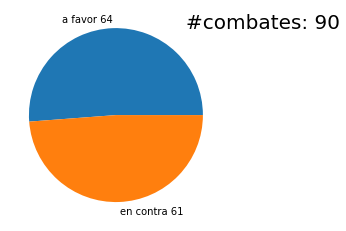

In [135]:
fig = plt.figure(figsize=(6, 4))
plt.pie(shido_counts.values, labels=shido_counts.index + " " + shido_counts.values.astype(str))
plt.annotate(f"#combates: {num_combates_approx}", (0.8, 1), fontsize=20)
plt.show()

In [198]:
fig.savefig(f"./{path_informe}{c.name} shidos %.png")

## Técnicas detail

In [199]:
tecnicas = a[~a.action_detail.str.contains("Shido")]
tecnicas_favor = tecnicas.groupby(['you', 'action_detail']).size().loc[1].sort_values(ascending=False)
tecnicas_contra = tecnicas.groupby(['you', 'action_detail']).size().loc[0].sort_values(ascending=False)

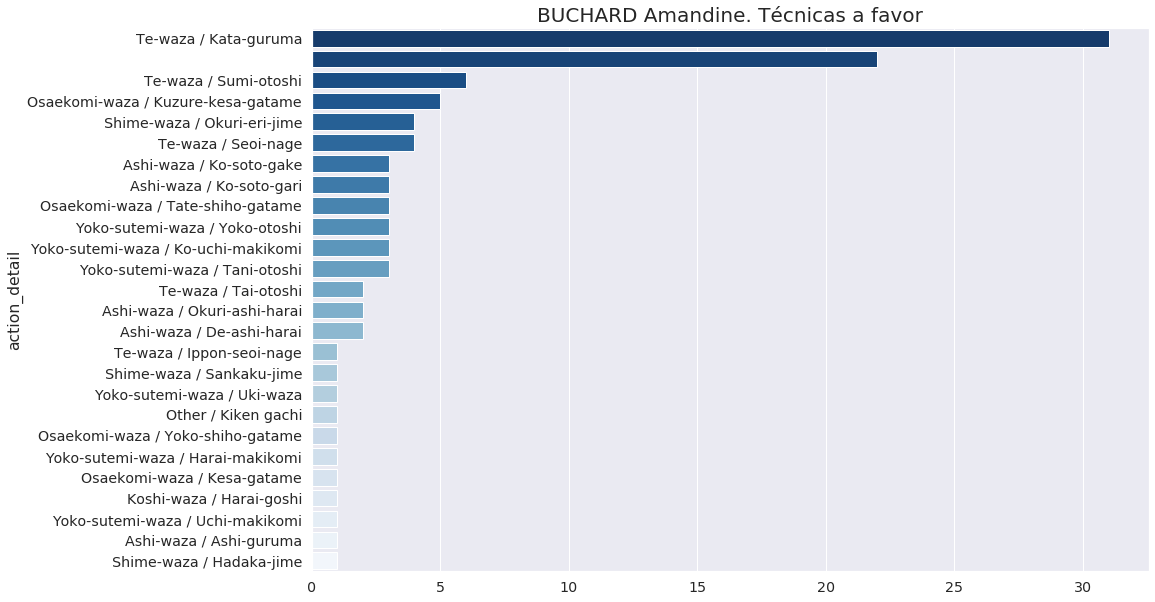

In [200]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.barplot(x=tecnicas_favor.values, y=tecnicas_favor.index, palette="Blues_r")
g.set_title(f"{c.name}. Técnicas a favor", fontsize=20);

In [201]:
fig.savefig(f"./{path_informe}{c.name} técnicas favor.png")

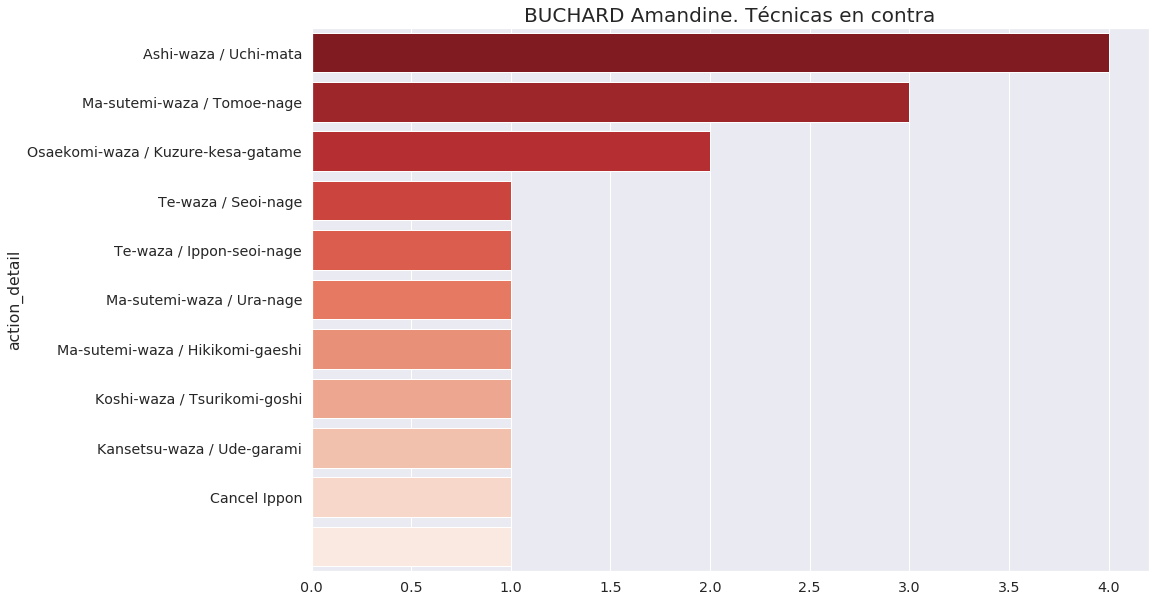

In [202]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.barplot(x=tecnicas_contra.values, y=tecnicas_contra.index, palette="Reds_r")
g.set_title(f"{c.name}. Técnicas en contra", fontsize=20);

In [203]:
fig.savefig(f"./{path_informe}{c.name} técnicas contra.png")

In [ ]:
from fpdf import FPDF

pdf = FPDF()

# imagelist is the list with all image filenames
pdf.add_page()
pdf.image("./informes/BABAMURATOVA Gulbadam/BABAMURATOVA Gulbadam shidos %.png" ,1, 1, 50, 50)
pdf.output("testt.pdf", "F")